Importing from Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression , Ridge , Lasso 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


Loading Data

In [3]:
df = pd.read_csv('./advertising.csv')
print("First few rows of the dataset:")
print(df.head())


First few rows of the dataset:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


Getting Initial Informations about Data

In [6]:
print("\nDataset Info:")
print(df.info())
print(df.describe())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


Searching for Missing Values

In [5]:
print("\nMissing Values in the Dataset:")
print(df.isnull().sum())


Missing Values in the Dataset:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


Data Analysis Visualizations

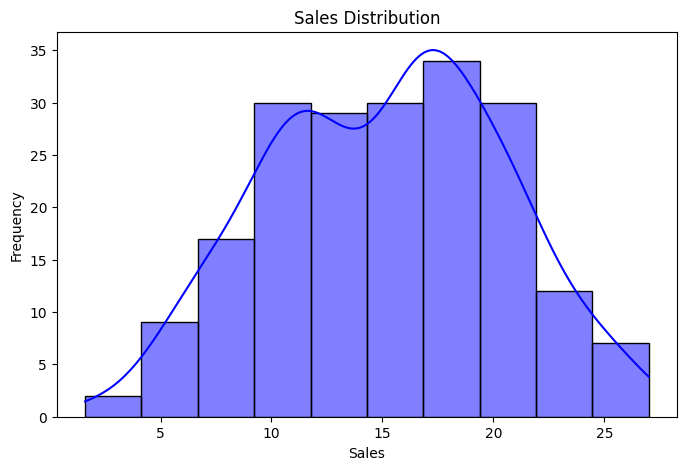

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Sales'], kde=True, color='blue')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

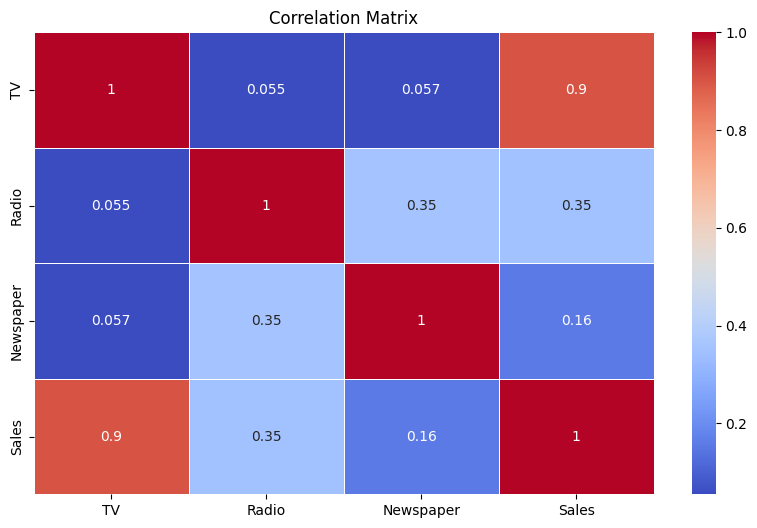

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

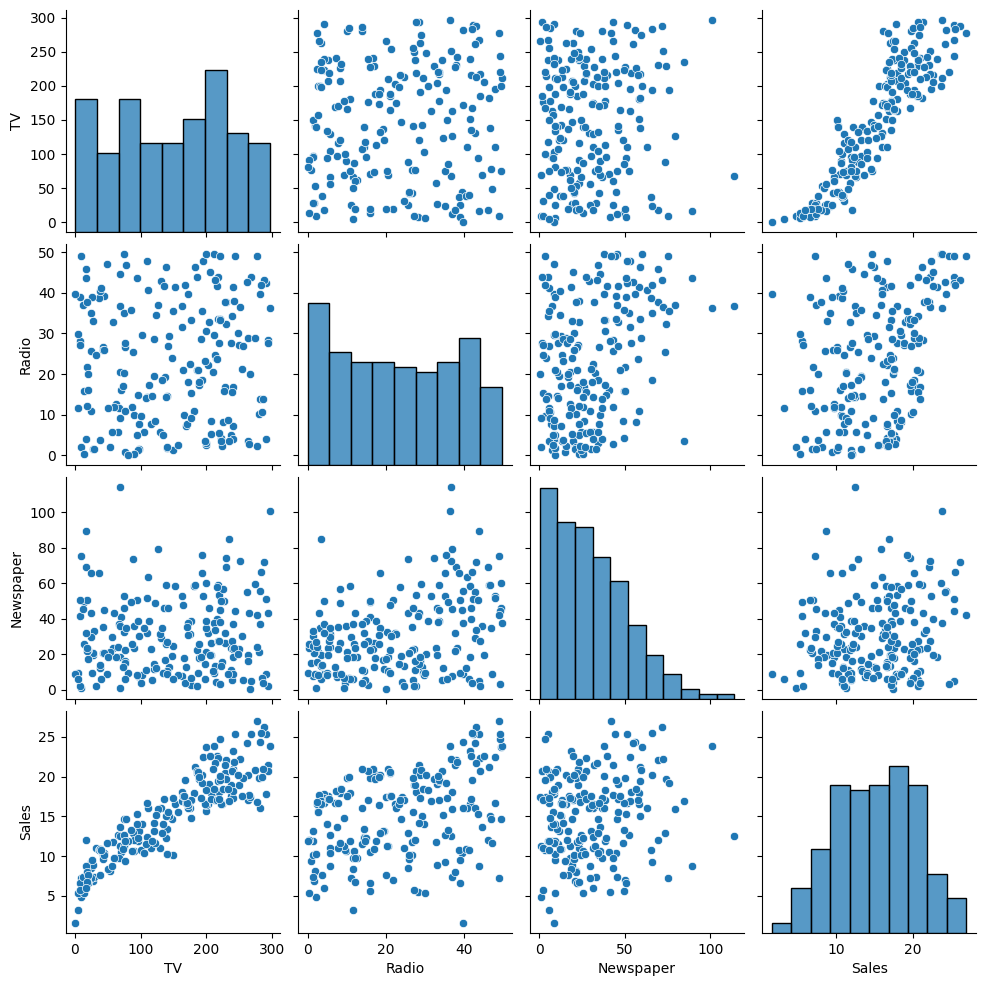

In [10]:
sns.pairplot(df)
plt.show()


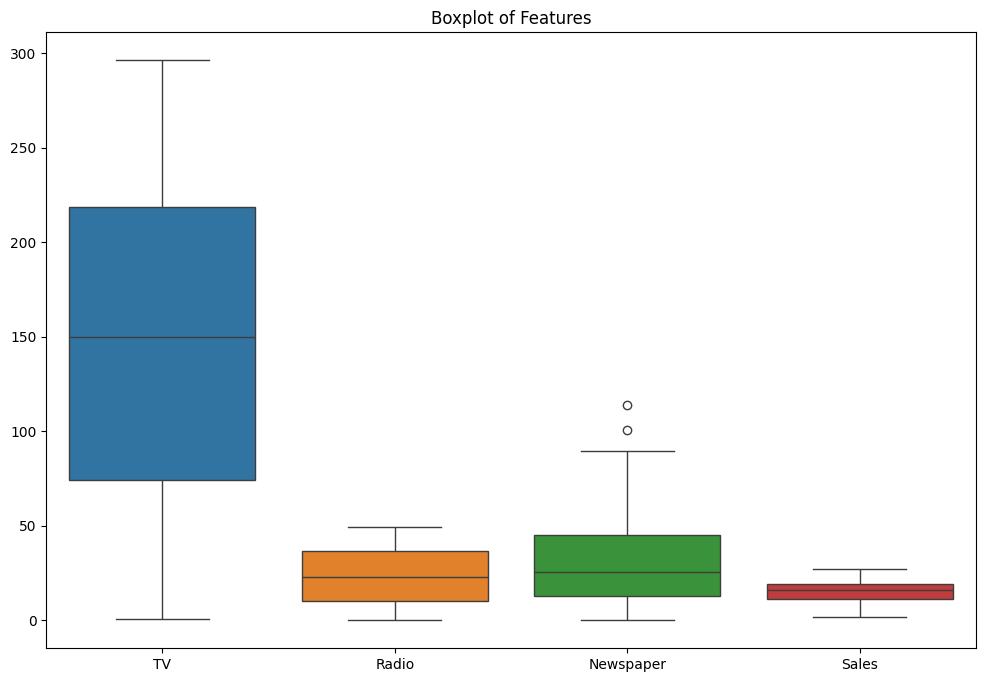

In [11]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['TV', 'Radio', 'Newspaper', 'Sales']])
plt.title('Boxplot of Features')
plt.show()


Deleting Outliers

In [12]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Original dataset size: {df.shape}")
print(f"Cleaned dataset size: {df_clean.shape}")

Original dataset size: (200, 4)
Cleaned dataset size: (198, 4)


Splitting and Standardizing Data

In [13]:
X = df_clean[['TV', 'Radio', 'Newspaper']]
y = df_clean['Sales']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model Evaluation function

In [14]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train)
    
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    return mse, rmse, r2

Building Regression Models 

In [16]:
model_performance = {}

# 1. Simple Linear Regression
linear_model = LinearRegression()
mse, rmse, r2 = evaluate_model(linear_model, X_train_scaled, X_test_scaled, y_train, y_test)
model_performance['Linear Regression'] = {'MSE': mse, 'RMSE': rmse, 'R2': r2}

# 2. Polynomial Regression (Degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
poly_model = LinearRegression()
mse, rmse, r2 = evaluate_model(poly_model, X_train_poly, X_test_poly, y_train, y_test)
model_performance['Polynomial Regression (Degree 2)'] = {'MSE': mse, 'RMSE': rmse, 'R2': r2}

# 3. Ridge Regression (L2 Regularization)
ridge_model = Ridge(alpha=1.0)
mse, rmse, r2 = evaluate_model(ridge_model, X_train_scaled, X_test_scaled, y_train, y_test)
model_performance['Ridge Regression'] = {'MSE': mse, 'RMSE': rmse, 'R2': r2}

# 4. Lasso Regression (L1 Regularization)
lasso_model = Lasso(alpha=0.1)
mse, rmse, r2 = evaluate_model(lasso_model, X_train_scaled, X_test_scaled, y_train, y_test)
model_performance['Lasso Regression'] = {'MSE': mse, 'RMSE': rmse, 'R2': r2}

Comparaisons of Regression Models errors and scores 

In [17]:
print("\nComparison of Regression Models:")
for model, metrics in model_performance.items():
    print(f"\nModel: {model}")
    print(f"MSE: {metrics['MSE']:.2f}")
    print(f"RMSE: {metrics['RMSE']:.2f}")
    print(f"R-squared: {metrics['R2']:.2f}")


Comparison of Regression Models:

Model: Linear Regression
MSE: 2.42
RMSE: 1.55
R-squared: 0.91

Model: Polynomial Regression (Degree 2)
MSE: 1.42
RMSE: 1.19
R-squared: 0.95

Model: Ridge Regression
MSE: 2.44
RMSE: 1.56
R-squared: 0.91

Model: Lasso Regression
MSE: 2.44
RMSE: 1.56
R-squared: 0.91


Visualizing Regression Models scores 

C:\Users\DELL\AppData\Local\Temp\ipykernel_13712\810042088.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_scores, palette='viridis')


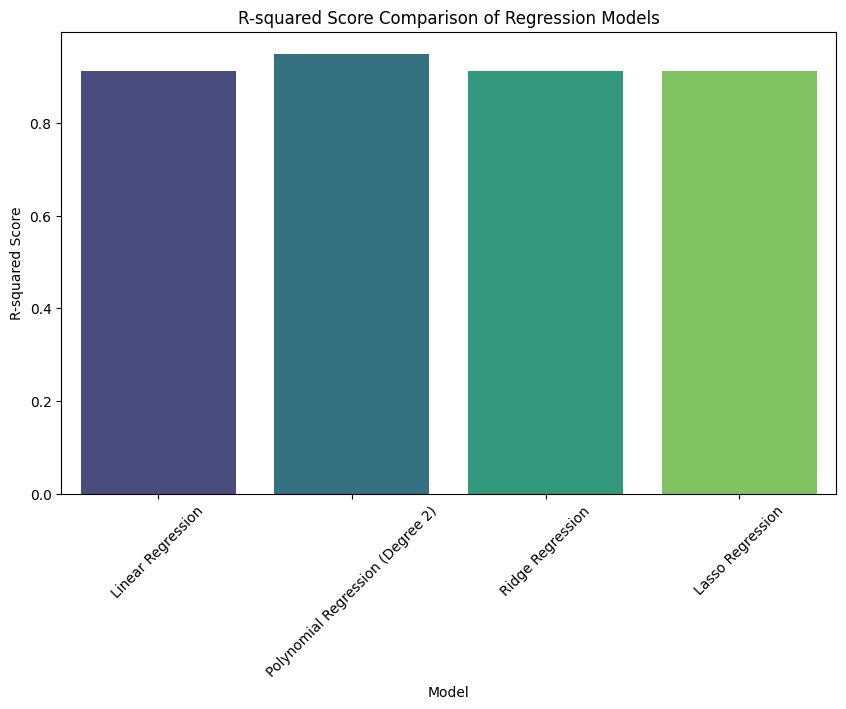

In [18]:
models = list(model_performance.keys())
r2_scores = [model_performance[model]['R2'] for model in models]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=r2_scores, palette='viridis')
plt.title('R-squared Score Comparison of Regression Models')
plt.ylabel('R-squared Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()